In [ ]:
# Utiliser le drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


On garde les prédicteurs Position, Dynamique et Commune pour la prédicition

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Lire le fichier csv fusionné (contenant les X (indices acoustiques) et les Y (Shannon_landscape_diversity, edge_density_100...))
df_sorties = pd.read_csv('/content/gdrive/MyDrive/ListenToTheWild/habitat&acousticIndicesFinal.csv')

# Drop it like it's hot
# df_sorties.drop(columns=['Unnamed: 0', 'file_name', 'station_name','Annee', 'Site_x', 'Position', 'Dynamique', 'Commune', 'LD', 'LID', 'Site_y', 'Code', 'Commune_y', 'Transect'], inplace = True)

# On ne garde que les colonnnes qui nous intéressent
df = df_sorties[['ZCR', 'MEANt', 'VARt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht',
        'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean',
        'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'LEQf', 'ENRf', 'BGNf',
        'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'ACI', 'NDSI', 'AnthroEnergy',
        'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'ACTspFract',
        'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount',
        'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma',
        'H_GiniSimpson', 'RAOQ', 'AGI', 'ROIcover', 'Position', 'Dynamique', 'Commune',
        'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
        'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
        'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

#  'Position', 'Dynamique',
#        'Commune', 'LD',

# Encoder les entrées des colonnes 'Dynamique', 'Position', 'Commune' pour l'apprentissage
columns_to_encode = ['Dynamique', 'Position', 'Commune']
label_encoders, encoded_values = {}, {}
for c in columns_to_encode:
    label_encoders[c] = LabelEncoder()
    df[c] = label_encoders[c].fit_transform(df[c])
    encoded_values[c] = dict(zip(label_encoders[c].classes_, label_encoders[c].transform(label_encoders[c].classes_)))

# Normaliser la donnée
# df_sorties = (df_sorties - df_sorties.mean()) / df_sorties.std()
df = (df - df.mean()) / df.std()

# Vérifier s'il y a des NaN
nan_check = df.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# df_entrees = df_sorties[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover']].copy()
# df_sorties.drop(columns=['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover'], inplace = True)

# Les variables à prédire
Y = df[['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
        'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
        'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df.drop(columns=[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)

# Obtenir la liste des colonnes
liste_colonne = df.columns.tolist()
print(liste_colonne)

There are no NaN values in the DataFrame.
['ZCR', 'MEANt', 'VARt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'ACI', 'NDSI', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROIcover', 'Position', 'Dynamique', 'Commune']


# Régression par un Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédire à partir du modèle
y_pred = rf_model.predict(X_test)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred- y_test) / y_test) * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (Regression Forest) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (Regression Forest) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (Regression Forest) :\n', max_relatif)

# # Scatter plot of true vs predicted values
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.title('True vs Predicted Values')
# plt.xlabel('True Values (LON)')
# plt.ylabel('Predicted Values (LON)')

# # Plotting the line of best fit
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Line of Best Fit')

# plt.legend()
# plt.show()

La moyenne erreur relative (Regression Forest) :
 total_edge_length_100              11.384156
edge_density_100                   11.384216
Shannon_landscape_diversity_100     5.370835
total_edge_length_250               8.616585
edge_density_250                    8.616604
Shannon_landscape_diversity_250    11.669943
total_edge_length_500              10.197979
edge_density_500                   10.197984
Shannon_landscape_diversity_500    12.546730
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (Regression Forest) :
 [2.71010518e-13 1.35505264e-13 1.40129255e-13 1.86866916e-13
 2.05733240e-13 1.85542845e-13 1.77180698e-13 1.80468074e-13
 1.92091646e-13]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (Regression Forest) :
 total_edge_length_100              6642.313383
edge_density_100    

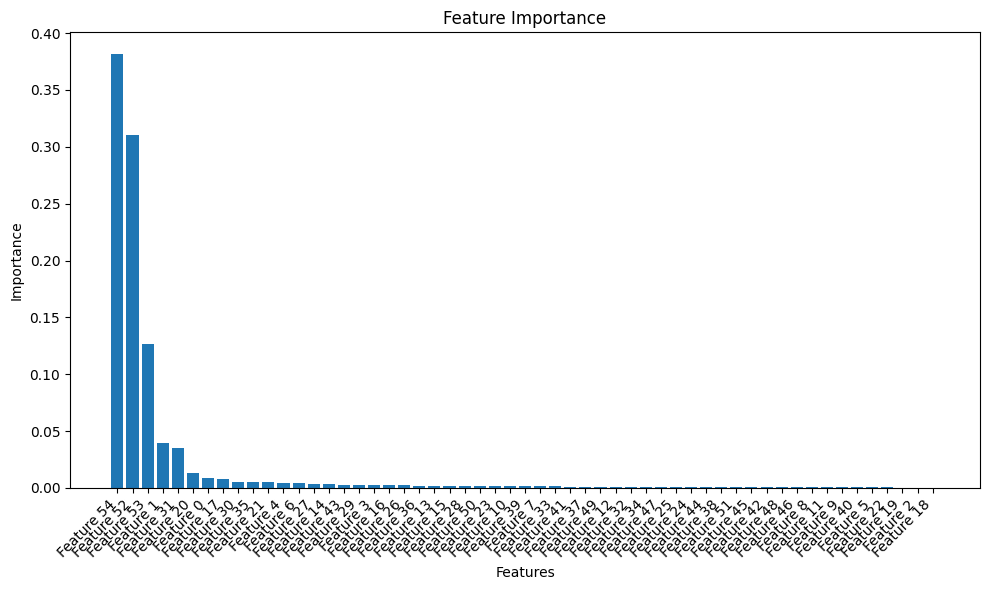

Index(['Commune', 'Position', 'Dynamique', 'MEANt', 'BI', 'BGNf', 'ZCR',
       'KURTf', 'BioEnergy', 'LFC'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt

# sélectionner l'importance des features
feature_importances = rf_model.feature_importances_

# Trier l'importance des features par ordre décroissant
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array([f"Feature {i}" for i in sorted_indices])

# Afficher l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select the most important features (e.g., top 10)
top_features_indices = feature_importances.argsort()[-10:][::-1]  # Select top 10 features

print(df.columns[top_features_indices])

Faire la même chose avec uniquement les indices acoustiques

In [ ]:
# Ne garder ce qui nous intéresse
df2 = df_sorties[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount',
                  'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf',
                  'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA',
                  'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount',
                  'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon',
                  'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover', 'total_edge_length_100',
                  'edge_density_100', 'Shannon_landscape_diversity_100', 'total_edge_length_250', 'edge_density_250',
                  'Shannon_landscape_diversity_250', 'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

df2 = (df2 - df2.mean()) / df2.std()

# Vérifier s'il y a des NaN
nan_check = df2.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# Les variables à prédire
Y = df2[[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
          'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
          'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df2.drop(columns=['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)
print(df2.shape[1] == 60)

There are no NaN values in the DataFrame.
True


In [ ]:
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(df2, Y, test_size=0.2, random_state=42)

# Entraîner le modèle
rf_model2.fit(X_train, y_train)

# Prédire à partir du modèle
y_pred = rf_model2.predict(X_test)

In [ ]:
# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred- y_test) / y_test) * 100
# erreur_relative = erreur_absolue / y_test * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (Regression Forest) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (Regression Forest) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (Regression Forest) :\n', max_relatif)

La moyenne erreur relative (Regression Forest) :
 total_edge_length_100              109.031149
edge_density_100                   109.031648
Shannon_landscape_diversity_100    119.467686
total_edge_length_250              112.593452
edge_density_250                   112.593474
Shannon_landscape_diversity_250     81.213320
total_edge_length_500              102.978506
edge_density_500                   102.979246
Shannon_landscape_diversity_500    169.853678
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (Regression Forest) :
 [65.42069229 65.4206896  56.48250249 70.02896022 70.02895444 58.96576993
 70.2652708  70.26527946 68.23735058]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (Regression Forest) :
 total_edge_length_100              10745.501009
edge_density_100                   107

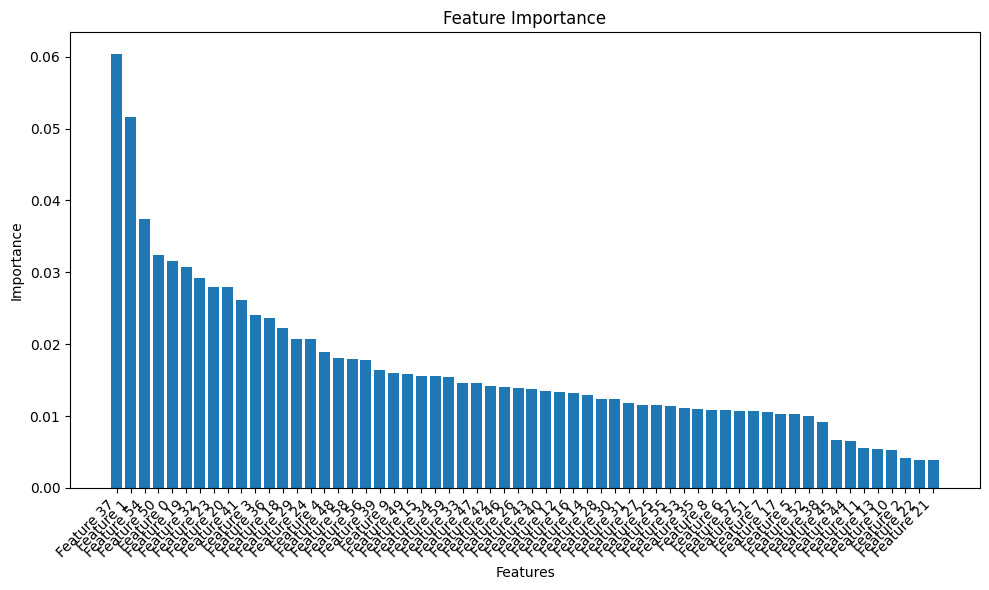

Index(['ACTspFract', 'MEANt', 'Commune', 'AGI', 'ZCR', 'ENRf', 'ROU', 'EAS',
       'BGNf', 'EVNspMean'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt

# sélectionner l'importance des features
feature_importances = rf_model2.feature_importances_

# Trier l'importance des features par ordre décroissant
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array([f"Feature {i}" for i in sorted_indices])

# Afficher l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select the most important features (e.g., top 10)
top_features_indices = feature_importances.argsort()[-10:][::-1]  # Select top 10 features

print(df.columns[top_features_indices])

Ne garder les indices qui ont bien marcher dans la première régression

In [ ]:
# Ne garder ce qui nous intéresse
df3 = df = df_sorties[['ZCR', 'MEANt', 'VARt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht',
        'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean',
        'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'LEQf', 'ENRf', 'BGNf',
        'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'ACI', 'NDSI', 'AnthroEnergy',
        'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'ACTspFract',
        'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount',
        'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma',
        'H_GiniSimpson', 'RAOQ', 'AGI', 'ROIcover',
        'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
        'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
        'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

df3 = (df3 - df3.mean()) / df3.std()

# Vérifier s'il y a des NaN
nan_check = df3.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# Les variables à prédire
Y = df3[[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
          'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
          'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df3.drop(columns=['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)

There are no NaN values in the DataFrame.


In [ ]:
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(df3, Y, test_size=0.2, random_state=42)

# Entraîner le modèle
rf_model3.fit(X_train, y_train)

# Prédire à partir du modèle
y_pred = rf_model3.predict(X_test)

In [ ]:
# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred- y_test) / y_test) * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (Regression Forest) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (Regression Forest) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (Regression Forest) :\n', max_relatif)

La moyenne erreur relative (Regression Forest) : total_edge_length_100              108.350286
edge_density_100                   108.350752
Shannon_landscape_diversity_100    123.158753
total_edge_length_250              113.295138
edge_density_250                   113.295174
Shannon_landscape_diversity_250     81.390093
total_edge_length_500              102.330026
edge_density_500                   102.330879
Shannon_landscape_diversity_500    171.047831
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (Regression Forest) : [64.15204956 64.15205731 56.87653961 69.12503104 69.12504235 58.66462221
 70.67717424 70.67716238 67.84916234]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (Regression Forest) : total_edge_length_100              11789.858776
edge_density_100                   11790.

Parmi les indices acoustiques, chercher ceux qui permettent au modèle de faire de meilleurs prédictions

In [ ]:
# Ne garder ce qui nous intéresse
df2 = df_sorties[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount',
                  'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf',
                  'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA',
                  'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount',
                  'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon',
                  'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover', 'total_edge_length_100',
                  'edge_density_100', 'Shannon_landscape_diversity_100', 'total_edge_length_250', 'edge_density_250',
                  'Shannon_landscape_diversity_250', 'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

df2 = (df2 - df2.mean()) / df2.std()

# Vérifier s'il y a des NaN
nan_check = df2.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# Les variables à prédire
Y = df2[[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
          'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
          'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df2.drop(columns=['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)
print(df2.shape[1] == 60)

There are no NaN values in the DataFrame.
True


In [ ]:
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(df2, Y, test_size=0.2, random_state=42)

# Entraîner le modèle
rf_model2.fit(X_train, y_train)

# Prédire à partir du modèle
y_pred = rf_model2.predict(X_test)

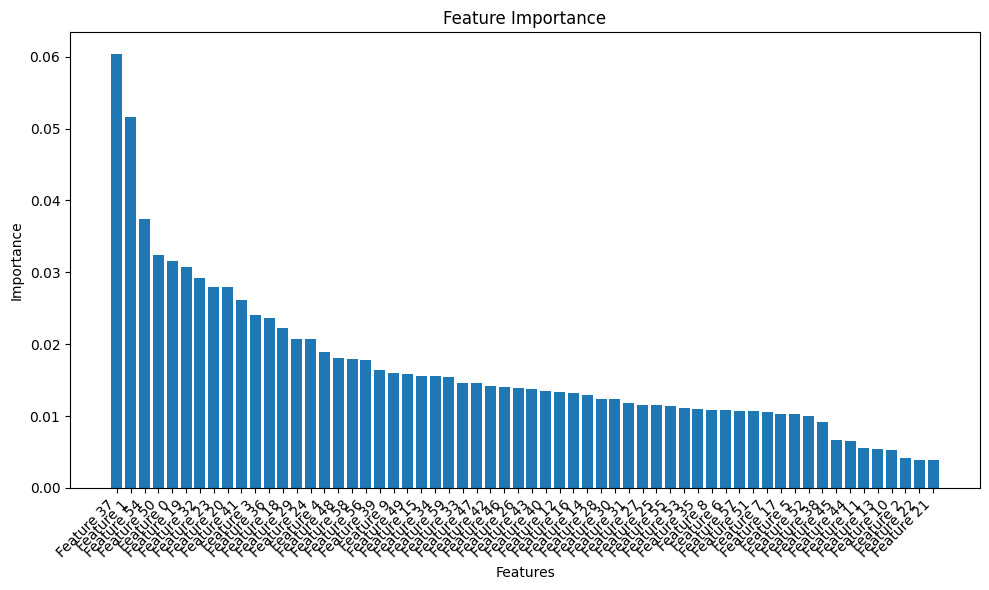

In [ ]:
import matplotlib.pyplot as plt

# sélectionner l'importance des features
feature_importances = rf_model2.feature_importances_

# Trier l'importance des features par ordre décroissant
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array([f"Feature {i}" for i in sorted_indices])

# Afficher l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Select the most important features (e.g., top 10)
top_features_indices = feature_importances.argsort()[-10:][::-1]  # Select top 10 features


X_train_selected = X_train.iloc[:, top_features_indices]
X_test_selected = X_test.iloc[:, top_features_indices]

# Train a new RandomForestRegressor model using only the selected features
rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate the performance of the new model
y_pred_selected = rf_model_selected.predict(X_test_selected)

In [ ]:
# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred_selected- y_test) / y_test) * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (Regression Forest) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (Regression Forest) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (Regression Forest) :\n', max_relatif)

La moyenne erreur relative (Regression Forest) :
 total_edge_length_100              115.755288
edge_density_100                   115.755846
Shannon_landscape_diversity_100    127.692651
total_edge_length_250              115.459865
edge_density_250                   115.459829
Shannon_landscape_diversity_250     84.747928
total_edge_length_500              110.287737
edge_density_500                   110.288963
Shannon_landscape_diversity_500    183.760415
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (Regression Forest) :
 [65.71502008 65.71503339 56.8520093  70.50917402 70.50913404 59.74310831
 70.83771338 70.83744244 68.70244989]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (Regression Forest) :
 total_edge_length_100              17768.930733
edge_density_100                   177

# Utiliser un XGBoost

In [ ]:
pip install xgboost

Ne garder que les indices acoustiques comme prédicteurs

In [ ]:
# Ne garder ce qui nous intéresse
df2 = df_sorties[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount',
                  'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf',
                  'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA',
                  'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount',
                  'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon',
                  'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover', 'total_edge_length_100',
                  'edge_density_100', 'Shannon_landscape_diversity_100', 'total_edge_length_250', 'edge_density_250',
                  'Shannon_landscape_diversity_250', 'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

df2 = (df2 - df2.mean()) / df2.std()

# Vérifier s'il y a des NaN
nan_check = df2.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# Les variables à prédire
Y = df2[[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
          'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
          'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df2.drop(columns=['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)
print(df2.shape[1] == 60)

There are no NaN values in the DataFrame.
True


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

xgb_model = xgb.XGBRegressor()

# Ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(df2, Y, test_size=0.2, random_state=42)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédire à partir du modèle
y_pred = xgb_model.predict(X_test)

In [ ]:

import numpy as np

# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred - y_test) / y_test) * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (XGBoost) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (XGBoost) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (XGBoost) :\n', max_relatif)

La moyenne erreur relative (XGBoost) :
 total_edge_length_100              146.716844
edge_density_100                   146.717678
Shannon_landscape_diversity_100    162.193936
total_edge_length_250              150.423027
edge_density_250                   150.422903
Shannon_landscape_diversity_250     98.853994
total_edge_length_500              146.014518
edge_density_500                   146.017099
Shannon_landscape_diversity_500    234.571797
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (XGBoost) :
 [71.79062775 71.79059686 56.50790576 76.43509921 76.4351051  62.37478516
 74.84769969 74.84767767 74.98933409]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (XGBoost) :
 total_edge_length_100              14279.048329
edge_density_100                   14279.722713
Shannon_landscape_di

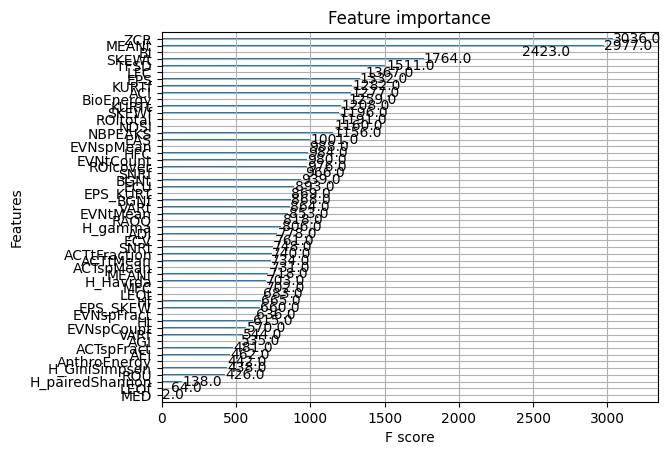

Top 10 most important features:
['ZCR', 'MEANt', 'BI', 'SKEWt', 'TFSD', 'LFC', 'EPS', 'KURTf', 'ACI', 'BioEnergy']


In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model, importance_type='weight')
plt.show()

# Assuming your trained model is stored in 'model'
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Sort the importance dictionary by values in descending order
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 most important features
top_10_features = [x[0] for x in sorted_importance[:10]]

print("Top 10 most important features:")
print(top_10_features)

On ajoute les prédicteurs Dynamique, Position et Commune

In [ ]:
from sklearn.preprocessing import LabelEncoder

# On ne garde que les colonnnes qui nous intéressent
df = df_sorties[['ZCR', 'MEANt', 'VARt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht',
        'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean',
        'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'LEQf', 'ENRf', 'BGNf',
        'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'ACI', 'NDSI', 'AnthroEnergy',
        'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'ACTspFract',
        'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount',
        'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma',
        'H_GiniSimpson', 'RAOQ', 'AGI', 'ROIcover', 'Position', 'Dynamique', 'Commune',
        'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
        'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
        'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

#  'Position', 'Dynamique',
#        'Commune', 'LD',

# Encoder les entrées des colonnes 'Dynamique', 'Position', 'Commune' pour l'apprentissage
columns_to_encode = ['Dynamique', 'Position', 'Commune']
label_encoders, encoded_values = {}, {}
for c in columns_to_encode:
    label_encoders[c] = LabelEncoder()
    df[c] = label_encoders[c].fit_transform(df[c])
    encoded_values[c] = dict(zip(label_encoders[c].classes_, label_encoders[c].transform(label_encoders[c].classes_)))

# Normaliser la donnée
# df_sorties = (df_sorties - df_sorties.mean()) / df_sorties.std()
df = (df - df.mean()) / df.std()

# Vérifier s'il y a des NaN
nan_check = df.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# df_entrees = df_sorties[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover']].copy()
# df_sorties.drop(columns=['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover'], inplace = True)

# Les variables à prédire
Y = df[['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
        'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
        'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df.drop(columns=[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)

# Obtenir la liste des colonnes
liste_colonne = df.columns.tolist()
print(liste_colonne)

There are no NaN values in the DataFrame.
['ZCR', 'MEANt', 'VARt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'ACI', 'NDSI', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROIcover', 'Position', 'Dynamique', 'Commune']


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

xgb_model2 = xgb.XGBRegressor()

# Ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Entraîner le modèle
xgb_model2.fit(X_train, y_train)

# Prédire à partir du modèle
y_pred = xgb_model2.predict(X_test)

In [ ]:
import numpy as np

# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred - y_test) / y_test) * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (XGBoost) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (XGBoost) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (XGBoost) :\n', max_relatif)

La moyenne erreur relative (XGBoost) :
 total_edge_length_100              51.016871
edge_density_100                   51.017202
Shannon_landscape_diversity_100    24.058421
total_edge_length_250              52.044473
edge_density_250                   52.044459
Shannon_landscape_diversity_250    31.741369
total_edge_length_500              47.658532
edge_density_500                   47.659213
Shannon_landscape_diversity_500    81.323494
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (XGBoost) :
 [11.38684767 11.38684535  4.91360166 14.29230206 14.29229235 10.34550386
 12.2875134  12.28751472 17.52419417]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (XGBoost) :
 total_edge_length_100              8230.422923
edge_density_100                   8230.808794
Shannon_landscape_diversity_100

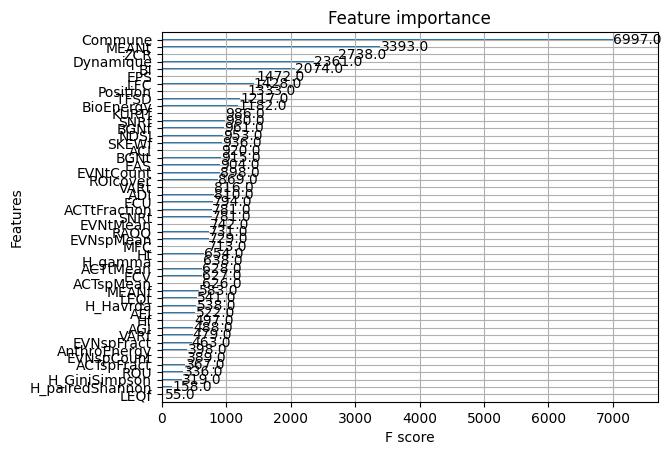

Top 10 most important features:
['Commune', 'MEANt', 'ZCR', 'Dynamique', 'BI', 'EPS', 'LFC', 'Position', 'TFSD', 'BioEnergy']


In [ ]:
plot_importance(xgb_model2, importance_type='weight')
plt.show()

# Assuming your trained model is stored in 'model'
importance = xgb_model2.get_booster().get_score(importance_type='weight')

# Sort the importance dictionary by values in descending order
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 most important features
top_10_features = [x[0] for x in sorted_importance[:10]]

print("Top 10 most important features:")
print(top_10_features)

# Multilayer perceptron

Dynamique, Commune, Position

In [ ]:
# On ne garde que les colonnnes qui nous intéressent
df = df_sorties[[ 'ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount',
                  'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf',
                  'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA',
                  'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount',
                  'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon',
                  'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover', 'Position', 'Dynamique', 'Commune',
                  'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

#  'Position', 'Dynamique',
#        'Commune', 'LD',

# Encoder les entrées des colonnes 'Dynamique', 'Position', 'Commune' pour l'apprentissage
columns_to_encode = ['Dynamique', 'Position', 'Commune']
label_encoders, encoded_values = {}, {}
for c in columns_to_encode:
    label_encoders[c] = LabelEncoder()
    df[c] = label_encoders[c].fit_transform(df[c])
    encoded_values[c] = dict(zip(label_encoders[c].classes_, label_encoders[c].transform(label_encoders[c].classes_)))

# Normaliser la donnée
# df_sorties = (df_sorties - df_sorties.mean()) / df_sorties.std()
df = (df - df.mean()) / df.std()

# Vérifier s'il y a des NaN
nan_check = df.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# df_entrees = df_sorties[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover']].copy()
# df_sorties.drop(columns=['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover'], inplace = True)

# Les variables à prédire
Y = df[['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
        'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
        'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df.drop(columns=[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)

# Obtenir la liste des colonnes
liste_colonne = df.columns.tolist()
print(len(liste_colonne))

There are no NaN values in the DataFrame.
63


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# standardiser les prédicteurs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# modèle MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(9)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Standardize the new data using the same scaler
X_new_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_new_scaled)

Epoch 1/50
589/589 - 2s - loss: 0.7285 - val_loss: 0.5894 - 2s/epoch - 4ms/step
Epoch 2/50
589/589 - 1s - loss: 0.5568 - val_loss: 0.5056 - 1s/epoch - 2ms/step
Epoch 3/50
589/589 - 1s - loss: 0.4879 - val_loss: 0.4603 - 1s/epoch - 2ms/step
Epoch 4/50
589/589 - 1s - loss: 0.4395 - val_loss: 0.4226 - 957ms/epoch - 2ms/step
Epoch 5/50
589/589 - 1s - loss: 0.4032 - val_loss: 0.3900 - 974ms/epoch - 2ms/step
Epoch 6/50
589/589 - 1s - loss: 0.3736 - val_loss: 0.3726 - 1s/epoch - 2ms/step
Epoch 7/50
589/589 - 1s - loss: 0.3502 - val_loss: 0.3450 - 962ms/epoch - 2ms/step
Epoch 8/50
589/589 - 1s - loss: 0.3296 - val_loss: 0.3341 - 1s/epoch - 2ms/step
Epoch 9/50
589/589 - 1s - loss: 0.3159 - val_loss: 0.3230 - 972ms/epoch - 2ms/step
Epoch 10/50
589/589 - 1s - loss: 0.3004 - val_loss: 0.3139 - 1s/epoch - 2ms/step
Epoch 11/50
589/589 - 1s - loss: 0.2876 - val_loss: 0.3065 - 1s/epoch - 3ms/step
Epoch 12/50
589/589 - 1s - loss: 0.2783 - val_loss: 0.3020 - 1s/epoch - 2ms/step
Epoch 13/50
589/589 - 1s 

In [ ]:
# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred- y_test) / y_test) * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (MLP) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (MLP) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (MLP) :\n', max_relatif)

La moyenne erreur relative (MLP) :
 total_edge_length_100              106.317736
edge_density_100                   106.318350
Shannon_landscape_diversity_100    108.739746
total_edge_length_250              129.520747
edge_density_250                   129.520722
Shannon_landscape_diversity_250     86.766596
total_edge_length_500              138.458482
edge_density_500                   138.462251
Shannon_landscape_diversity_500    227.814859
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (MLP) :
 [29.4918983  29.49188577 21.87937445 39.32430767 39.32441781 31.9545149
 40.32635803 40.32635687 49.04269839]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (MLP) :
 total_edge_length_100              16249.732873
edge_density_100                   16250.500987
Shannon_landscape_diversity_100  

      Feature  Importance
62    Commune   37.181618
1       MEANt   27.976368
60   Position   26.032923
61  Dynamique   25.102259
41        LFC   15.478832
37         BI   14.001375
33       NDSI   13.778079
0         ZCR   12.004875
8         MED   11.715394
5        LEQt   10.220718


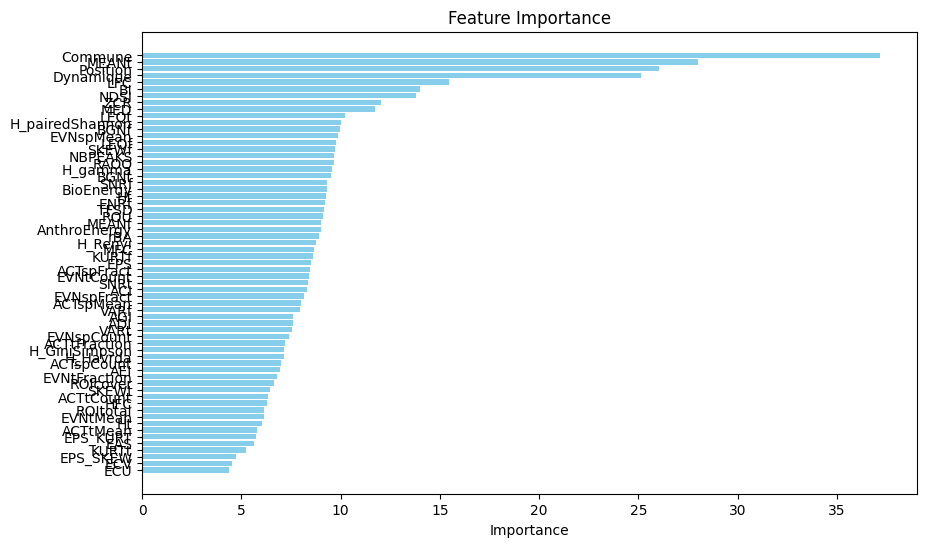

In [ ]:
# Get the weights of the connections between the input layer and the first hidden layer
input_layer_weights = model.layers[0].get_weights()[0]

# Assuming you have the feature names from your dataset
feature_names = list(df.columns)

# Calculate the importance of each feature based on the sum of absolute weights
feature_importance = np.sum(np.abs(input_layer_weights), axis=1)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df[0:10])

import matplotlib.pyplot as plt

# Assuming you have already calculated and sorted feature_importance_df

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Ne garder ce qui nous intéresse
df2 = df_sorties[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount',
                  'ACTtMean', 'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf',
                  'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA',
                  'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC', 'ACTspFract', 'ACTspCount',
                  'ACTspMean', 'EVNspFract', 'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon',
                  'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover', 'total_edge_length_100',
                  'edge_density_100', 'Shannon_landscape_diversity_100', 'total_edge_length_250', 'edge_density_250',
                  'Shannon_landscape_diversity_250', 'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']].copy()

df2 = (df2 - df2.mean()) / df2.std()

# Vérifier s'il y a des NaN
nan_check = df2.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# Les variables à prédire
Y = df2[[ 'total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
          'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
          'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500']]

# Ne garder que les prédicteurs
df2.drop(columns=['total_edge_length_100', 'edge_density_100', 'Shannon_landscape_diversity_100',
                  'total_edge_length_250', 'edge_density_250', 'Shannon_landscape_diversity_250',
                  'total_edge_length_500', 'edge_density_500', 'Shannon_landscape_diversity_500'], inplace = True)
print(df2.shape[1] == 60)

There are no NaN values in the DataFrame.
True


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(df2, Y, test_size=0.2, random_state=42)

# standardiser les prédicteurs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# modèle MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(9)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Standardize the new data using the same scaler
X_new_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_new_scaled)

Epoch 1/50
589/589 - 2s - loss: 0.9485 - val_loss: 0.8692 - 2s/epoch - 3ms/step
Epoch 2/50
589/589 - 1s - loss: 0.8582 - val_loss: 0.8332 - 1s/epoch - 2ms/step
Epoch 3/50
589/589 - 1s - loss: 0.8231 - val_loss: 0.8037 - 1s/epoch - 2ms/step
Epoch 4/50
589/589 - 1s - loss: 0.7975 - val_loss: 0.7919 - 1s/epoch - 2ms/step
Epoch 5/50
589/589 - 1s - loss: 0.7749 - val_loss: 0.7695 - 1s/epoch - 2ms/step
Epoch 6/50
589/589 - 1s - loss: 0.7594 - val_loss: 0.7589 - 976ms/epoch - 2ms/step
Epoch 7/50
589/589 - 1s - loss: 0.7428 - val_loss: 0.7396 - 976ms/epoch - 2ms/step
Epoch 8/50
589/589 - 1s - loss: 0.7289 - val_loss: 0.7282 - 1s/epoch - 2ms/step
Epoch 9/50
589/589 - 1s - loss: 0.7159 - val_loss: 0.7191 - 1s/epoch - 2ms/step
Epoch 10/50
589/589 - 1s - loss: 0.7034 - val_loss: 0.7288 - 1s/epoch - 3ms/step
Epoch 11/50
589/589 - 1s - loss: 0.6949 - val_loss: 0.7199 - 1s/epoch - 2ms/step
Epoch 12/50
589/589 - 1s - loss: 0.6840 - val_loss: 0.7045 - 1s/epoch - 2ms/step
Epoch 13/50
589/589 - 1s - loss

In [ ]:
# Calcul de l'erreur relative
erreur_relative = np.abs((y_pred- y_test) / y_test) * 100
moyenne_relative = np.mean(erreur_relative, axis= 0)
mediane_relative = np.median(erreur_relative, axis = 0)
max_relatif = np.max(erreur_relative, axis = 0)
print('La moyenne erreur relative (MLP) :\n', moyenne_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('La médiane erreur relative (MLP) :\n', mediane_relative)
print('---------------------------------------------------------------------------------------------------------------')
print('Le maximum erreur relative (MLP) :\n', max_relatif)

La moyenne erreur relative (MLP) :
 total_edge_length_100              167.389867
edge_density_100                   167.390632
Shannon_landscape_diversity_100    187.599334
total_edge_length_250              191.112011
edge_density_250                   191.111656
Shannon_landscape_diversity_250    119.294353
total_edge_length_500              175.232274
edge_density_500                   175.236887
Shannon_landscape_diversity_500    269.281923
dtype: float64
---------------------------------------------------------------------------------------------------------------
La médiane erreur relative (MLP) :
 [75.30437196 75.30435916 64.43411082 79.55606381 79.55605451 69.12769481
 80.17139291 80.171359   85.46624336]
---------------------------------------------------------------------------------------------------------------
Le maximum erreur relative (MLP) :
 total_edge_length_100              17754.178246
edge_density_100                   17755.022883
Shannon_landscape_diversity_100 

     Feature  Importance
1      MEANt   28.143887
37        BI   21.123005
33      NDSI   18.117178
41       LFC   17.503340
0        ZCR   15.707047
20   NBPEAKS   14.987018
51  H_Havrda   14.815420
50      TFSD   14.665234
32       ACI   14.377583
54   H_gamma   14.240680


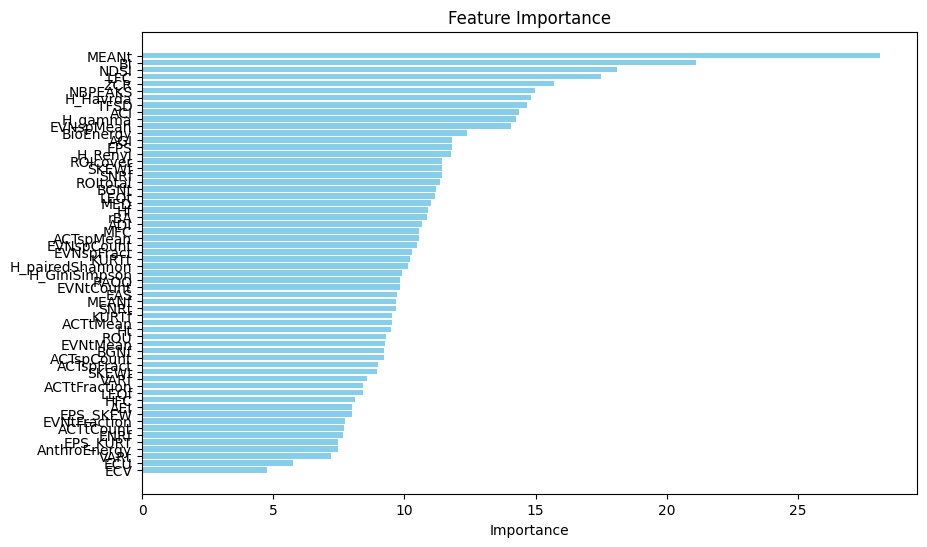

In [ ]:
# Get the weights of the connections between the input layer and the first hidden layer
input_layer_weights = model.layers[0].get_weights()[0]

# Assuming you have the feature names from your dataset
feature_names = list(df2.columns)

# Calculate the importance of each feature based on the sum of absolute weights
feature_importance = np.sum(np.abs(input_layer_weights), axis=1)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df[0:10])

import matplotlib.pyplot as plt

# Assuming you have already calculated and sorted feature_importance_df

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Sans les derniers prédicteurs